#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [45]:
## Reading the image plaksha_Faculty.jpg
img=cv2.imread("Plaksha_Faculty.jpg")

## Convert the image to grayscale
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text ="Face Detected" ## The text you want to write
font =cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale =0.5  ## Font scale factor
font_color =(0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness =1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img,text,(x,y-5),font,font_scale,font_color,font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
#cv2.imshow(f"Total number of faces detected are {len(faces_rect)}",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


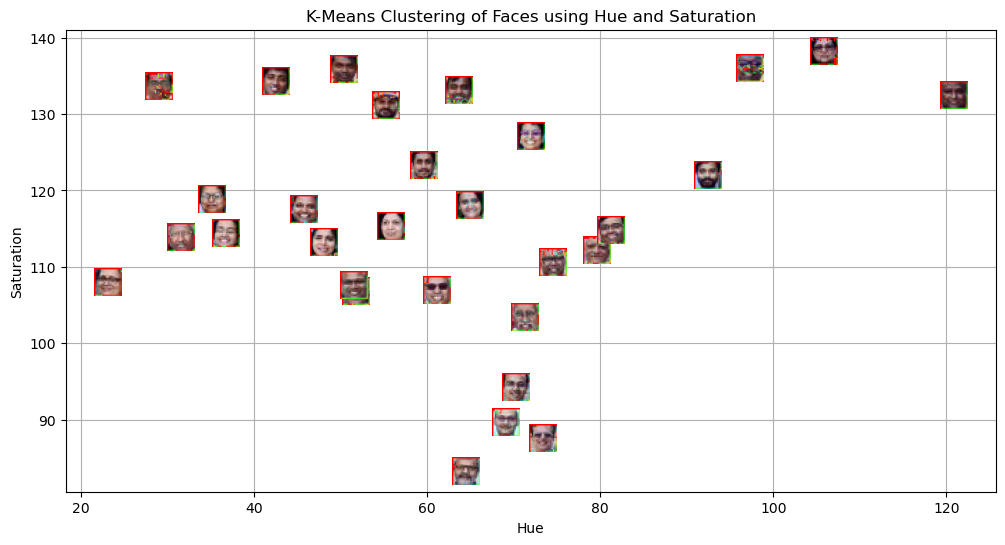

In [47]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
#kmeans = KMeans(n_clusters=2,random_state=42).fit(hue_saturation)
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("K-Means Clustering of Faces using Hue and Saturation")
## Put grid
plt.grid(True)
## show the plot
plt.show()

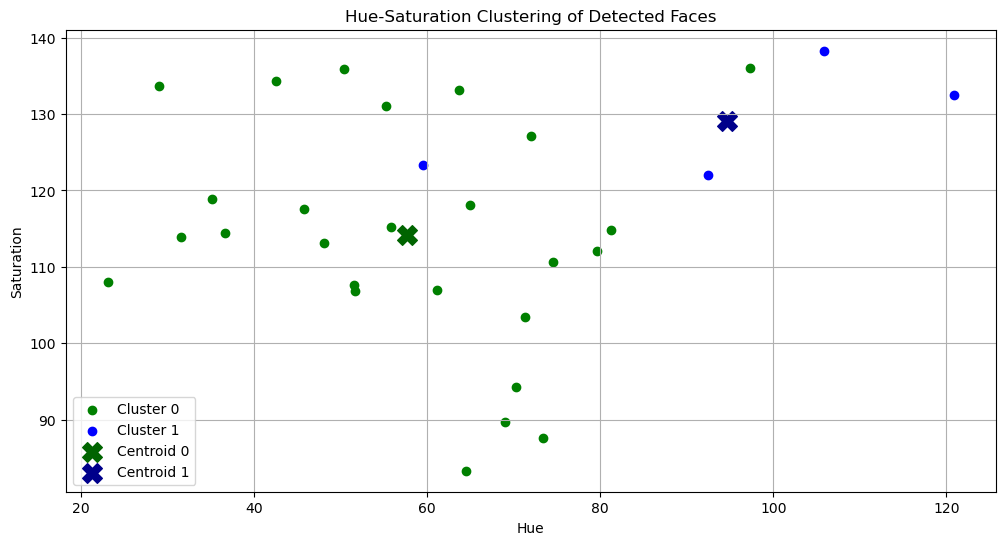

In [49]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color='green',label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color='blue',label='Cluster 1')

# Calculate and plot centroids
centroid_0 =np.mean(cluster_0_points,axis=0)
centroid_1 =np.mean(cluster_1_points,axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],centroid_0[1],color='darkgreen',marker='X',s=200,label='Centroid 0')
plt.scatter(centroid_1[0],centroid_1[1],color='darkblue',marker='X',s=200,label='Centroid 1')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Hue-Saturation Clustering of Detected Faces")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

In [51]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img =cv2.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces =face_cascade.detectMultiScale(cv2.cvtColor(template_img,cv2.COLOR_BGR2GRAY),1.05,4,minSize=(25,25),maxSize=(200,200))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
#cv2.imshow("Template Face Detection",template_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()      

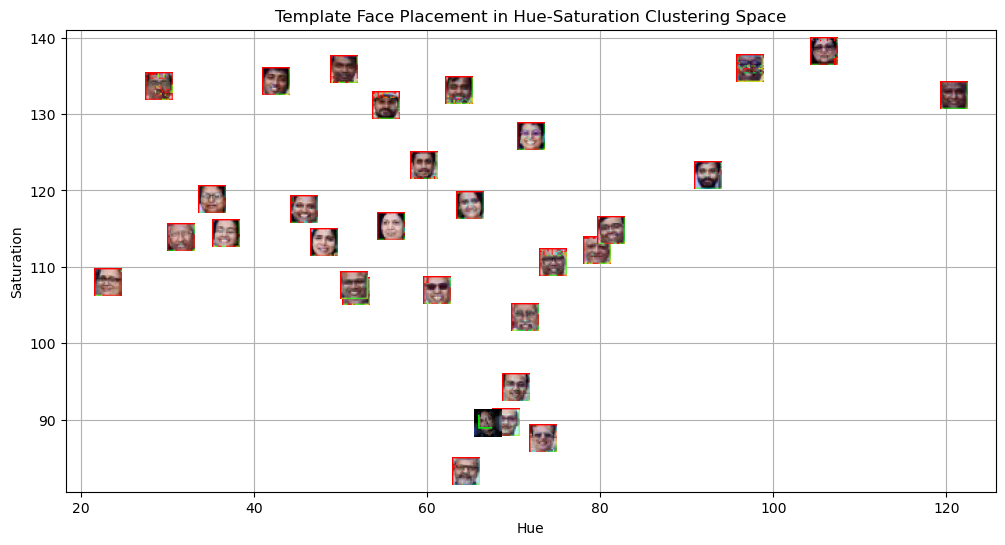

In [53]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv =cv2.cvtColor(template_img,cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue =np.mean(template_hsv[:,:,0])
template_saturation =np.mean(template_hsv[:,:,1])

# Predict the cluster label for the template image and store it in template_label
template_label =np.argmin(distance.cdist([(template_hue,template_saturation)],kmeans.cluster_centers_))

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Template Face Placement in Hue-Saturation Clustering Space")
## Add grid
plt.grid(True)
## show plot
plt.show()

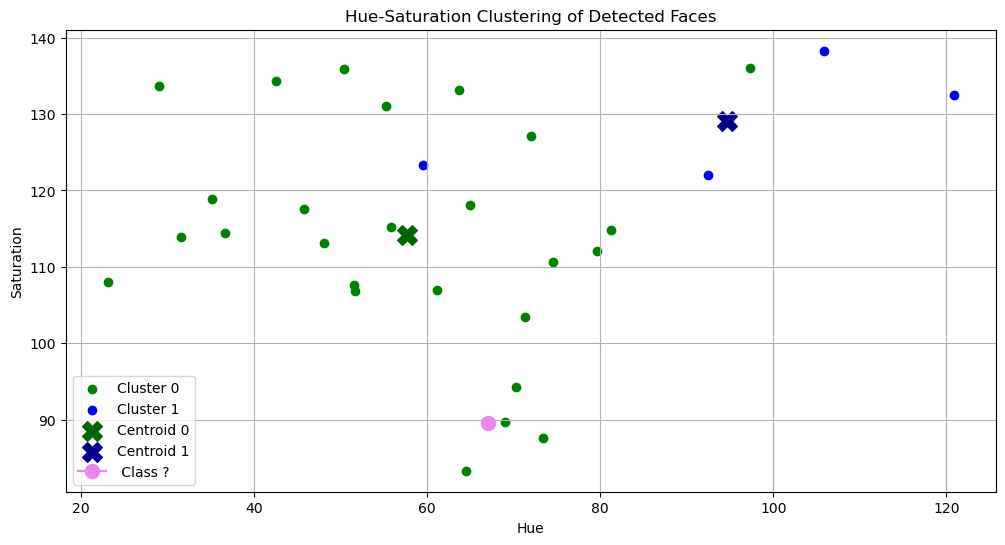

In [55]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color='green',label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color='blue',label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 =np.mean(cluster_0_points,axis=0)
centroid_1 =np.mean(cluster_1_points,axis=0)
plt.scatter(centroid_0[0],centroid_0[1],color='darkgreen',marker='X',s=200,label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0],centroid_1[1],color='darkblue',marker='X',s=200,label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Hue-Saturation Clustering of Detected Faces")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

Answer 1 : Distance based classification algorithms rely on a distance metric to determine how close a new data point is to existing data points or class centroids. A valid distance metric must satisy non-negativity, symmetry, identity, and the triangle inequality. Euclidean distance, Mahalanobis distance,etc. are the metrics used to quanitfy similarity such that smaller distance implies higher similarity, which forms the basis of distance-based classificaton menthods like the nearest-neighbour classifiers and centroid-based classifiers.

Answer 2 : There are many real-world applications of the distance-based classificatoin algorithms. Some of these applications include Image classification and face recognition, document and text classification, spam filtering, customer behaviour prediction, disease classification, anomaly and fraud detection, credit worthiness assessment and speech recognition.

Answer 3 : 
Euclidean Distance : it represents the shortest distance between two points in feature space. It is most widely used due to its simpicity and computational ease, it is used in clustering algorithms like K-Means and DBScan.
It however, does not take into account varriance of the data causing misleading similarity measurements when features have significant variances. 
Mahalanobis Distance : it measures the distance between a point and a disribution rather than distance between 2 points. It calculates the no. of standard deviations a point is away from mean of the distribution. 
It accounts for feature variance and covariance, making it more suitable when features are correlated or have different sclaes.

Answer 4 : Cross-Validation is used to evaluate how well a model generalizes to unseen data. Doing this prevents overfitting, provides a more reliable estimate of model performance, and helps select hyperparameter that yield better generalization. 

Answer 5 : Bias and variance are controlled by the value of K in KNN. If the K is low, the model follows the training data, the results are low in bias but have high variance, hence, the classifier becomes sensitive to noise and small fluctuations in the data.
If the K is high the deicison boundary becomes smoother and the results are higher in bias but lower in variance. The model might oversimplify the classification and misclassify points near class boundaries.
There is therefore, a trade-off between bias and variance and hence selecting an appropriate value of K is crucial to achieve optimal performance.